Using cache found in C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-3 Python-3.9.0 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 1080x1080 1 bird
Speed: 3.0ms pre-process, 10.0ms inference, 111.1ms NMS per image at shape (1, 3, 640, 640)


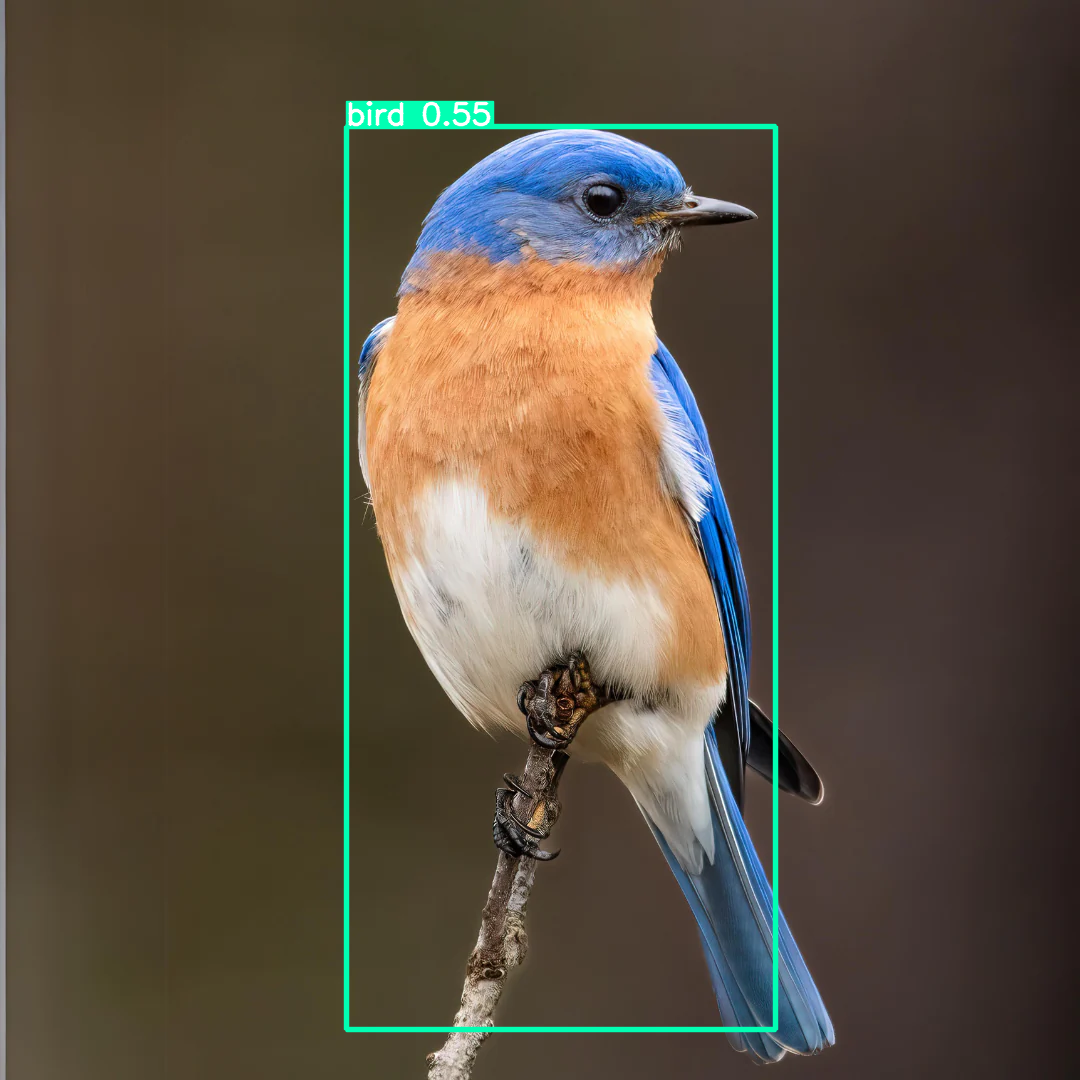

In [13]:
import torch
import matplotlib.pyplot as plt
import cv2
 
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
img_path = r"F:\works\A-important\A-neurals\#full_stack\deep_learning\Real\image.png"   
img = cv2.imread(img_path)  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
results = model(img_rgb)
print(results)
results.show()

In [23]:
import torch
from efficientnet_pytorch import EfficientNet
from torchvision import transforms
from PIL import Image
import requests
import cv2
# Load the EfficientNet model (pretrained on ImageNet)
model = EfficientNet.from_pretrained('efficientnet-b0')

# Set the model to evaluation mode
model.eval()

# Load the image
img_path = r"F:\works\A-important\A-neurals\#full_stack\deep_learning\Real\image.png"  # Replace with your image path
img = Image.open(img_path)

# Define the transformation (resize and normalize)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformation
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(img_tensor)

# Convert the output logits to probabilities (softmax)
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Get the predicted class index (argmax)
predicted_class = probabilities.argmax().item()

# Load the ImageNet class labels
LABELS_URL = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(LABELS_URL)
class_idx = response.json()

# Get the name of the predicted class
predicted_class_name = class_idx[str(predicted_class)][1]

# Print the prediction result with the class name and probability
print(f"Predicted Class: {predicted_class_name}, Probability: {probabilities[predicted_class]:.4f}")


Loaded pretrained weights for efficientnet-b0
Predicted Class: brambling, Probability: 0.4015


In [21]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import requests

# Load the ResNet model (pretrained on ImageNet)
model = models.resnet18(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Load the image
img_path = r"F:\works\A-important\A-neurals\#full_stack\deep_learning\Real\image.png"  # Replace with your image path
img = Image.open(img_path)

# Define the transformation (resize and normalize)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformation
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(img_tensor)

# Convert the output logits to probabilities (softmax)
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Get the predicted class index (argmax)
predicted_class = probabilities.argmax().item()

# Load the ImageNet class labels
LABELS_URL = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(LABELS_URL)
class_idx = response.json()

# Get the name of the predicted class
predicted_class_name = class_idx[str(predicted_class)][1]

# Print the prediction result with the class name and probability
print(f"Predicted Class: {predicted_class_name}, Probability: {probabilities[predicted_class]:.4f}")


Predicted Class: brambling, Probability: 0.3170


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set random seed for reproducibility
tf.random.set_seed(42)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN architecture
model = models.Sequential([
    # First Conv block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Conv block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Conv block
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('cifar10_training_history.png')

# Compute and display confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.savefig('cifar10_confusion_matrix.png')

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set random seed
tf.random.set_seed(42)

# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN Architecture
model = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Conv Layer 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Conv Layer 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    # Flatten and Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CIFAR-10")
plt.show()
